In [89]:
import pandas as pd
import numpy as np
df = pd.read_csv ("diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [90]:
df['readmitted'] = df['readmitted'].replace(['NO','>30','<30'],['0','0','1'])
df['readmitted'] = df['readmitted'].astype('int')

In [91]:
df = df.drop(['encounter_id','patient_nbr','weight','examide','citoglipton','diag_1','diag_2','diag_3'],axis=1)
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [92]:
#discharge_disposition_id informs where the patient has gone after discharging. Ids 11,13,14,19,20,21 represent death or Hospice they cannot be returned
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [93]:
#Numerical Columns in dataset
df_num_cols = df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
df_num_cols.isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [95]:
df_num_cols = pd.concat([df_num_cols], axis=1)
df_num_cols.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.319855,0.189908,0.463757,-0.009214,-0.009573,0.074251,0.220600
num_lab_procedures,0.319855,1.000000,0.051715,0.265148,-0.007610,-0.000980,0.039908,0.149663
num_procedures,0.189908,0.051715,1.000000,0.381931,-0.025263,-0.038715,-0.067021,0.070460
num_medications,0.463757,0.265148,0.381931,1.000000,0.046037,0.014028,0.065266,0.261639
number_outpatient,-0.009214,-0.007610,-0.025263,0.046037,1.000000,0.091668,0.108015,0.094829
number_emergency,-0.009573,-0.000980,-0.038715,0.014028,0.091668,1.000000,0.267702,0.055994
number_inpatient,0.074251,0.039908,-0.067021,0.065266,0.108015,0.267702,1.000000,0.104737
number_diagnoses,0.220600,0.149663,0.070460,0.261639,0.094829,0.055994,0.104737,1.000000


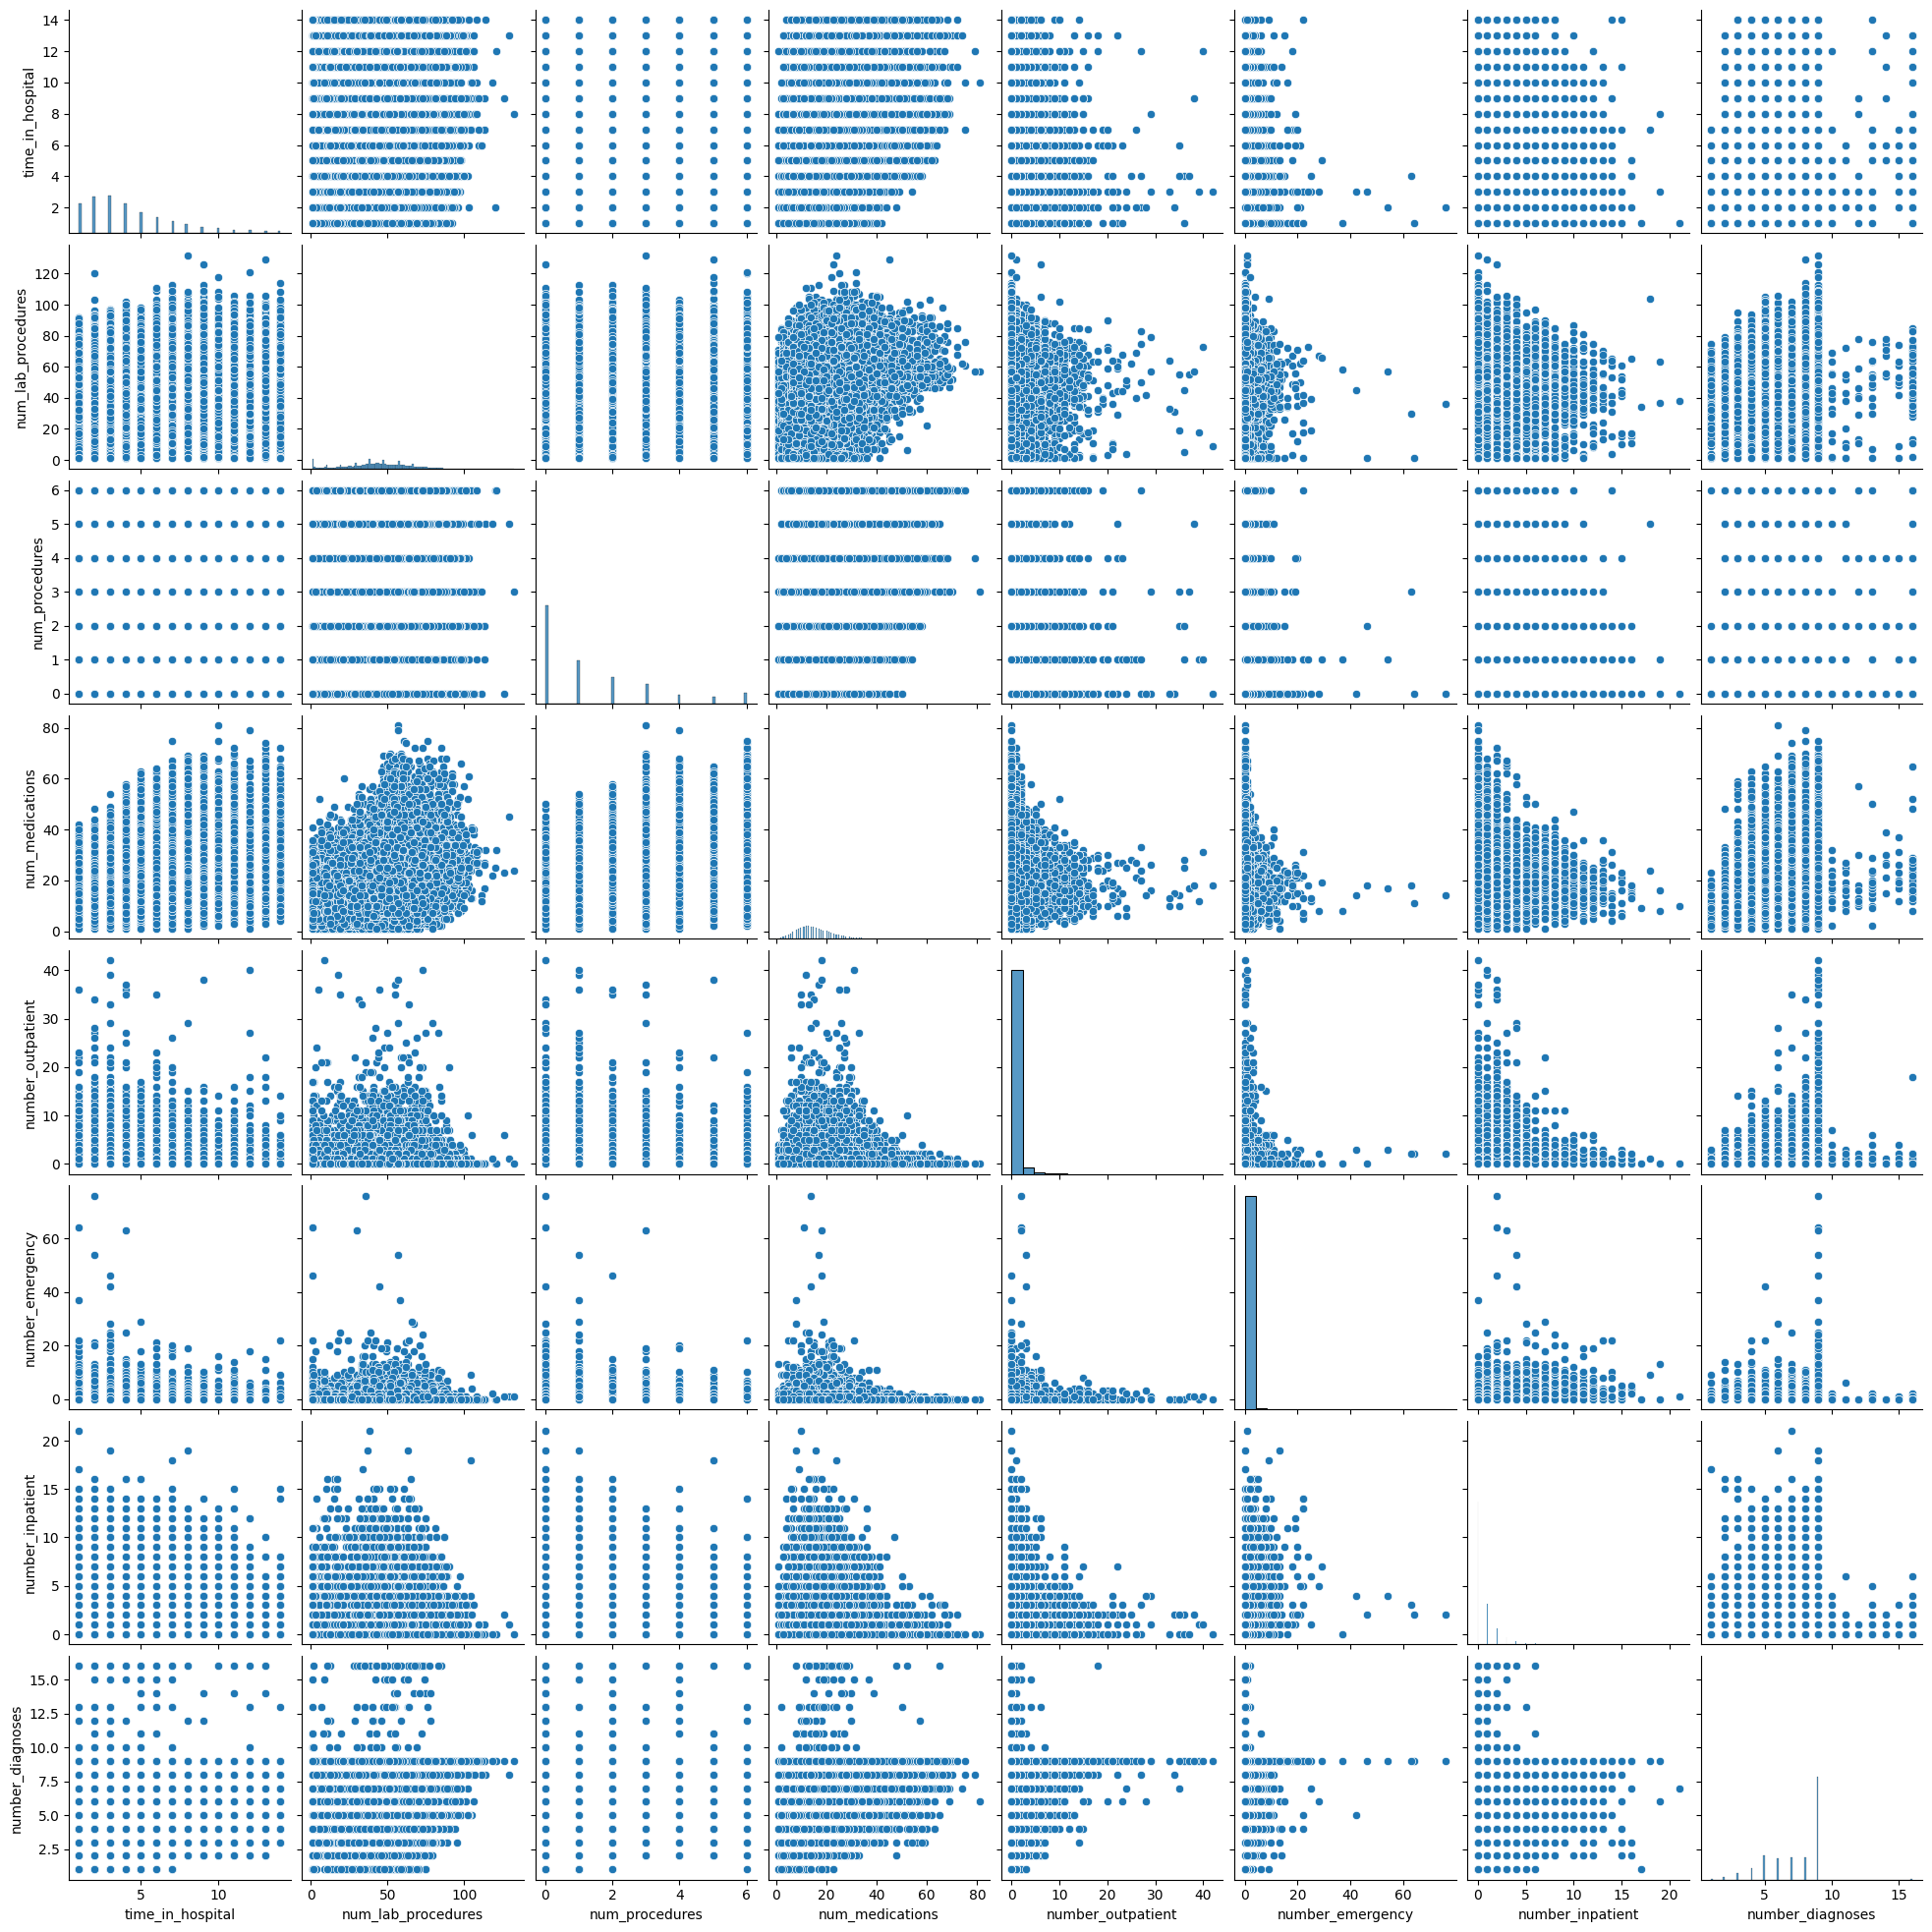

In [172]:
sns.pairplot(df_num_cols)

<Axes: ylabel='Count'>

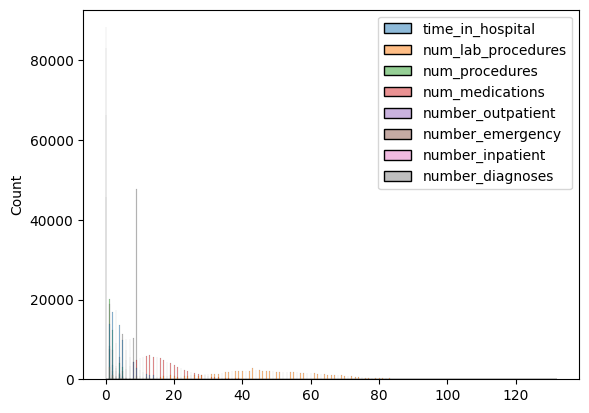

In [174]:
sns.histplot(df_num_cols)

In [96]:
#Categorical Columns in dataset
categorical_columns=['race', 'gender','payer_code','max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [98]:
#Fill UKN with NA
df['race'] = df['race'].fillna('UKN')
df['medical_specialty'] = df['medical_specialty'].fillna('UKN')
df['payer_code'] = df['payer_code'].fillna('UKN')

In [99]:
df1 = df.groupby('medical_specialty').size().sort_values(ascending=False)

In [101]:
#Top 10 medical speciality
df1.head(10)

medical_specialty
UKN                           48616
InternalMedicine              14237
Emergency/Trauma               7419
Family/GeneralPractice         7252
Cardiology                     5279
Surgery-General                3059
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Radiologist                    1121
dtype: int64

In [102]:
top_10 = ['UKN','InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General','Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']

In [103]:
#Rename >10 medical speciality as Other
df.loc[~df.medical_specialty.isin(top_10),'medical_specialty'] = 'Other'

In [104]:
df['admission_type_id'] = df['admission_type_id'].astype('str')
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype('str')
df['admission_source_id'] = df['admission_source_id'].astype('str')

In [105]:
df['admission_type_id'].unique()

array(['6', '1', '2', '3', '4', '5', '8', '7'], dtype=object)

In [106]:
df.to_csv('df_naive.csv')

In [109]:
#Dummy variables for categorical columns
df_cat = pd.get_dummies(df[categorical_columns + ['admission_type_id','discharge_disposition_id','admission_source_id','medical_specialty']],drop_first=True)

In [110]:
list(df_cat)

['race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UKN',
 'gender_Male',
 'gender_Unknown/Invalid',
 'payer_code_CH',
 'payer_code_CM',
 'payer_code_CP',
 'payer_code_DM',
 'payer_code_FR',
 'payer_code_HM',
 'payer_code_MC',
 'payer_code_MD',
 'payer_code_MP',
 'payer_code_OG',
 'payer_code_OT',
 'payer_code_PO',
 'payer_code_SI',
 'payer_code_SP',
 'payer_code_UKN',
 'payer_code_UN',
 'payer_code_WC',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 't

In [111]:
df['age']

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 99343, dtype: object

In [112]:
dff = pd.concat([df_cat, df_num_cols, df['age']],axis=1)
dff

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,medical_specialty_UKN,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age
0,0,1,0,0,0,0,0,0,0,0,...,0,1,41,0,1,0,0,0,1,[0-10)
1,0,1,0,0,0,0,0,0,0,0,...,1,3,59,0,18,0,0,0,9,[10-20)
2,0,0,0,0,0,0,0,0,0,0,...,1,2,11,5,13,2,0,1,6,[20-30)
3,0,1,0,0,0,1,0,0,0,0,...,1,2,44,1,16,0,0,0,7,[30-40)
4,0,1,0,0,0,1,0,0,0,0,...,1,1,51,0,8,0,0,0,5,[40-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,0,1,0,0,0,0,...,1,3,51,0,16,0,0,0,9,[70-80)
101762,0,0,0,0,0,0,0,0,0,0,...,1,5,33,3,18,0,0,1,9,[80-90)
101763,0,1,0,0,0,1,0,0,0,0,...,1,1,53,0,9,1,0,0,13,[70-80)
101764,0,1,0,0,0,0,0,0,0,0,...,0,10,45,2,21,0,0,1,9,[80-90)


In [114]:
#Replacing age with mean value
age_id = {'[0-10)':5, 
          '[10-20)':15, 
          '[20-30)':25, 
          '[30-40)':35, 
          '[40-50)':45, 
          '[50-60)':55,
          '[60-70)':65, 
          '[70-80)':75, 
          '[80-90)':85, 
          '[90-100)':95}
dff['age_group'] = dff.age.replace(age_id)

In [115]:
dff = pd.concat([dff,df['readmitted']],axis=1)

In [116]:
dff = dff.drop(['age'],axis=1)

In [117]:
df = dff
df.corr()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group,readmitted
race_Asian,1.000000,-0.137092,-0.011482,-0.009782,-0.012098,0.005587,-0.000438,0.000344,-0.001757,-0.008644,...,-0.011305,-0.007866,0.000007,-0.027157,-0.013140,-0.009159,-0.010603,-0.015264,0.001773,-0.002607
race_Caucasian,-0.137092,1.000000,-0.247436,-0.210791,-0.260697,0.055796,-0.009445,0.002397,-0.017092,0.019741,...,-0.006125,-0.024138,0.032885,0.057437,0.058531,-0.021769,-0.002150,0.109863,0.168633,0.007524
race_Hispanic,-0.011482,-0.247436,1.000000,-0.017655,-0.021835,-0.000092,-0.000791,-0.003557,-0.004804,0.001804,...,-0.015944,-0.001632,-0.019246,-0.035363,-0.004726,0.004851,-0.002016,-0.036339,-0.063343,-0.003980
race_Other,-0.009782,-0.210791,-0.017655,1.000000,-0.018601,0.009541,0.014487,-0.002435,-0.002358,-0.006179,...,-0.005035,0.001678,0.014092,-0.013289,-0.010374,0.005943,-0.017235,-0.015509,-0.025632,-0.006201
race_UKN,-0.012098,-0.260697,-0.021835,-0.018601,1.000000,0.011184,0.023877,-0.002144,-0.013591,0.005038,...,-0.004356,0.008451,-0.004054,-0.003902,-0.021031,-0.024857,-0.039403,-0.057624,0.005907,-0.014197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
number_emergency,-0.009159,-0.021769,0.004851,0.005943,-0.024857,-0.021463,-0.001163,-0.002608,0.010551,-0.013962,...,-0.009573,-0.000980,-0.038715,0.014028,0.091668,1.000000,0.267702,0.055994,-0.087568,0.060885
number_inpatient,-0.010603,-0.002150,-0.002016,-0.017235,-0.039403,-0.015188,-0.002751,-0.010061,-0.006691,-0.025608,...,0.074251,0.039908,-0.067021,0.065266,0.108015,0.267702,1.000000,0.104737,-0.044337,0.168326
number_diagnoses,-0.015264,0.109863,-0.036339,-0.015509,-0.057624,-0.003421,-0.003969,0.006858,0.032343,0.008346,...,0.220600,0.149663,0.070460,0.261639,0.094829,0.055994,0.104737,1.000000,0.241269,0.053580
age_group,0.001773,0.168633,-0.063343,-0.025632,0.005907,-0.050515,0.002041,-0.008617,0.045918,-0.081214,...,0.107077,0.016323,-0.027885,0.043166,0.023671,-0.087568,-0.044337,0.241269,1.000000,0.022196


In [118]:
#Random shuffling
df = df.sample(n = len(df))
df = df.reset_index(drop = True)

In [119]:
#70% training and 30% training + validation
df_valid_test = df.sample(frac=0.30)

In [120]:
#15% test and 15% valdiation
df_test = df_valid_test.sample(frac = 0.5)
df_valid = df_valid_test.drop(df_test.index)
df_train = df.drop(df_valid_test.index)

In [121]:
def calc_prevalence(y_actual):
    return sum(y_actual) / len(y_actual)

In [122]:
print(f'Prevalence of test set(n = {len(df_test)}): {calc_prevalence(df_test.readmitted.values)}')
print(f'Prevalence of validation set(n = {len(df_valid)}): {calc_prevalence(df_valid.readmitted.values)}')
print(f'Prevalence of training set(n = {len(df_train)}): {calc_prevalence(df_train.readmitted.values)}')

Prevalence of test set(n = 14902): 0.1150181183733727
Prevalence of validation set(n = 14901): 0.11462317965237233
Prevalence of training set(n = 69540): 0.11348863963186655


In [123]:
rows_pos = df_train.readmitted == 1
df_train_pos = df_train.loc[rows_pos] #Positive cases
df_train_neg = df_train.loc[~rows_pos] #Negative cases

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos))],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train)).reset_index(drop = True)


In [124]:
df_train

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UKN,gender_Male,gender_Unknown/Invalid,payer_code_CH,payer_code_CM,payer_code_CP,...,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_group,readmitted
0,0,1,0,0,0,0,0,0,0,0,...,9,39,3,16,0,0,1,9,75,1
1,0,1,0,0,0,1,0,0,0,0,...,2,31,1,19,0,0,0,9,75,1
2,0,1,0,0,0,1,0,0,0,0,...,4,27,0,12,0,0,3,9,85,1
3,0,1,0,0,0,1,0,0,0,0,...,7,31,0,11,0,0,0,6,85,1
4,0,1,0,0,0,0,0,0,0,0,...,5,66,0,12,0,0,0,9,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15779,0,1,0,0,0,0,0,0,0,0,...,5,56,0,10,0,0,2,9,65,0
15780,0,1,0,0,0,1,0,0,0,0,...,7,43,0,13,0,1,1,9,85,0
15781,0,1,0,0,0,0,0,0,0,0,...,3,43,0,18,0,0,0,6,65,1
15782,0,1,0,0,0,1,0,0,0,0,...,3,71,0,6,0,0,0,6,35,0


In [126]:
#Splitting data
X_train = df_train.loc[:, df_train.columns != 'readmitted']
y_train = df_train['readmitted']
X_valid = df_valid.loc[:, df_valid.columns != 'readmitted']
y_valid = df_valid['readmitted']
X_test =  df_test.loc[:, df_test.columns != 'readmitted']
y_test = df_test['readmitted']

In [127]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train)

X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [128]:
pd.DataFrame(X_train_tf)[9].unique()

array([-0.15320888,  6.52703684])

In [129]:
X_train.shape

(15784, 142)

In [130]:
X_train_tf.shape

(15784, 142)

In [137]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def print_report(y_actual, y_pred, thresh):    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
    print(f'AUC : {auc}')
    print(f'Accuracy : {accuracy}')
    print(f'Recall : {recall}')
    print(f'Precision : {precision}')
    print(f'Specificity : {specificity}')
    print(f'Prevalence : {calc_prevalence(y_actual)}')    
    return auc, accuracy, recall, precision, specificity 

In [132]:
thresh = 0.5

#Logistic Regression

In [143]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_tf, y_train)

y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train, y_train_preds, thresh)

print('\nValidation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

Logistic Regression
Training:
AUC : 0.6748550631189584
Accuracy : 0.6274708565636087
Recall : 0.562341611758743
Precision : 0.6465617715617715
Specificity : 0.6926001013684744
Prevalence : 0.5

Validation:
AUC : 0.6671317342192856
Accuracy : 0.6568015569424871
Recall : 0.5532786885245902
Precision : 0.17843655589123866
Specificity : 0.6702038960054575
Prevalence : 0.11462317965237233


In [134]:
print(lr.coef_, lr.intercept_)

[[-5.34477689e-03  2.84949198e-03 -1.29811851e-02 -3.41150699e-02
  -1.72785818e-02  1.40998521e-02  0.00000000e+00 -1.07021750e-02
  -1.49978765e-02 -4.56953376e-03  2.56346137e-02  0.00000000e+00
   4.46955564e-03  1.93830385e-02  1.42160439e-02 -1.93552754e-02
   8.69079042e-03  8.20542924e-03 -1.14776847e-02 -4.97771879e-03
   1.01089298e-02  1.09584494e-01  1.34579828e-02 -1.77441112e-02
   9.41726269e-03 -1.21709382e-02  3.85175559e-02 -2.31840431e-02
   4.51383919e-02 -1.60665820e-02 -9.78498672e-02 -1.51714564e-01
  -5.68096487e-02  1.24756436e-01  1.21707756e-01  3.04869613e-02
  -4.07207509e-03  3.97753247e-03 -2.65474815e-02  2.01679845e-02
  -3.42631752e-03 -6.30815379e-02 -1.38471559e-02 -3.38075488e-02
  -1.06538283e-02  0.00000000e+00 -2.15275812e-01 -1.99203191e-01
  -2.62112871e-02 -2.15865935e-02 -2.20845542e-02  1.24232123e-02
   6.02266203e-02 -4.38548936e-02 -4.65533667e-02 -2.29458611e-02
   5.44564919e-02  5.84164430e-02 -1.96377292e-04 -1.45482888e-01
  -1.45787

#STOCHASTIC GRADIENT DESCENT

In [145]:
#STOCHASTIC GRADIENT DESCENT
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('\nValidation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Stochastic Gradient Descend
Training:
AUC : 0.6717258637834793
Accuracy : 0.6227192093258996
Recall : 0.5688038520020273
Precision : 0.6375514841641812
Specificity : 0.676634566649772
Prevalence : 0.5

Validation:
AUC : 0.6665583249651056
Accuracy : 0.6477417622978323
Recall : 0.569672131147541
Precision : 0.17732823036267542
Specificity : 0.6578488592435382
Prevalence : 0.11462317965237233


#KNN

In [146]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('\nValidation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC : 0.6425209265145351
Accuracy : 0.5958565636087176
Recall : 0.5153319817536746
Precision : 0.6142576650052862
Specificity : 0.6316523061327927
Prevalence : 0.5

Validation:
AUC : 0.6206796379671216
Accuracy : 0.6412321320716731
Recall : 0.5064402810304449
Precision : 0.16114008941877794
Specificity : 0.6140377472902296
Prevalence : 0.11462317965237233


#Naive Bayes

In [148]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('\nValidation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC : 0.5121172062067512
Accuracy : 0.5036746071971617
Recall : 0.9917638114546377
Precision : 0.5018594511413182
Specificity : 0.015585402939685758
Prevalence : 0.5

Validation:
AUC : 0.5112163172543243
Accuracy : 0.1256291524058788
Recall : 0.9929742388758782
Precision : 0.11527220825120642
Specificity : 0.013340407792010915
Prevalence : 0.11462317965237233


# LogisticRegression

In [149]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tqdm import tqdm
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [150]:
class LogisticRegression:
    def __init__(self, X_train, y_train,X_test,y_test,learningRate, tolerance, maxIteration=20000, index=[], drop=False):
        self.X_train=X_train
        self.y_train=y_train
        self.X_test=X_test
        self.y_test=y_test
        self.learningRate=learningRate
        self.tolerance=tolerance
        self.maxIteration=maxIteration
        self.index=index
        self.drop=drop
    
    def addX0(self,X):
        return np.column_stack([np.ones([X.shape[0],1]),X])
    
    def sigmoid(self,z):
        sig=1/(1+np.exp(-z))
        return sig
    
    def costFunction(self,X,y):
        sig=self.sigmoid(X.dot(self.w))
        pred=y*np.log(sig)+(1-y)*np.log(1-sig)
        cost=pred.sum()
        return cost
    
    def gradient(self, X,y):
        sig=self.sigmoid(X.dot(self.w))
        grad=(sig-y).dot(X)
        return grad
    
    def gradientDescent(self,X,y):
        costSequence=[]
        last=float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate*(self.gradient(X,y))
            cur_cost= self.costFunction(X,y)
            diff=last-cur_cost
            costSequence.append(abs(cur_cost))
            if diff<self.tolerance:
                print("Model stopped")
                break
        self.plotCost(costSequence)
        return
    
    def plotCost(self, costSequence):
        axis=list(range(0, len(costSequence),1))
        fig, ax = plt.subplots()
        ax.plot(axis, costSequence)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost Function')
        ax.set_title('Cost Function')
        ax.grid()
        plt.show()
    
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y==1)
        y_hat = (y_hat==1)
        accuracy= (y==y_hat).sum()/y.size
        recall=(y&y_hat).sum()/y.sum()
        return accuracy, recall
    
    def runModel(self):
        self.X_train, self.y_train, self.X_test, self.y_test = self.X_train, self.y_train, self.X_test, self.y_test       
        self.w=np.ones(self.X_train.shape[1], dtype=np.float64)*0
        self.gradientDescent(self.X_train, self.y_train)
        print('The model params are {}'.format(self.w))
        
        y_hat_train=self.predict(self.X_train)
        accuracy, recall = self.evaluate(self.y_train, y_hat_train)
       
        print("Evaluation for training data: \n")
        print("Accuracy", accuracy)
        print("Recall", recall)
        
        y_hat_test=self.predict(self.X_test)
        accuracy_test, recall_test = self.evaluate(self.y_test, y_hat_test)
        
        print("\nEvaluation for test data: \n")
        print("Accuracy", accuracy_test)
        print("Recall", recall_test)
       
        
        return 

In [168]:
regression = LogisticRegression(X_train_tf, y_train, X_valid_tf, y_valid, learningRate=0.000000001, tolerance=0.001)

100%|██████████| 20000/20000 [03:13<00:00, 103.13it/s]


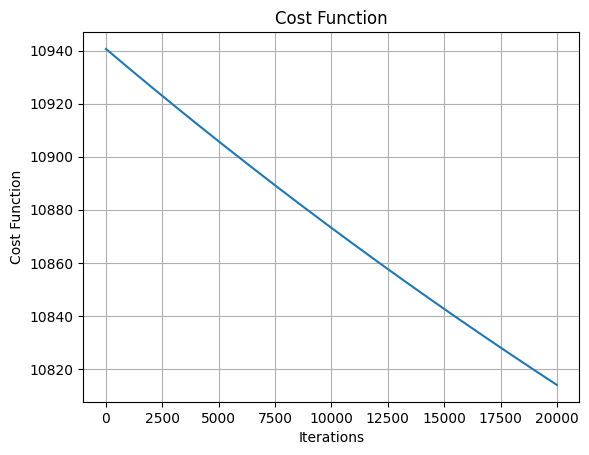

The model params are [-7.21631665e-04  2.98111267e-03 -1.35254763e-03 -3.21869764e-03
 -2.95697089e-03 -6.71861536e-04  0.00000000e+00 -1.80471375e-03
 -1.13290553e-03 -3.34831812e-03  1.91742823e-03  0.00000000e+00
 -1.96409885e-03  3.29142993e-03  2.45379201e-05 -7.30954150e-04
 -1.12671489e-04  6.88993591e-06 -2.29247291e-03 -9.87143559e-04
 -1.76890946e-03  2.14227130e-03 -1.71839026e-03 -1.89215790e-03
  2.37987001e-03 -2.21788553e-03  1.48280432e-03 -5.48476911e-03
  7.54319415e-03 -3.76654653e-03  6.12374613e-03 -5.85339290e-03
 -2.77928127e-03 -1.24914170e-03  1.50511812e-03 -5.27437877e-05
 -1.77150865e-04  5.39968376e-04 -1.63474363e-03  1.85774563e-03
 -1.58690469e-03 -1.22869369e-03  1.65688858e-03 -1.65122268e-03
 -5.19182756e-04  0.00000000e+00 -1.57876629e-03  2.41733266e-04
  2.03341675e-03  4.79886139e-04 -9.11942409e-04  8.96648919e-04
  1.21098249e-03  1.08971512e-03 -1.11387210e-03 -5.77061709e-04
  1.76630134e-04 -8.72311969e-05 -4.67648326e-04 -1.97296667e-04
 -4.

In [169]:
regression.runModel()

In [170]:
regression = LogisticRegression(X_train_tf, y_train, X_test_tf, y_test, learningRate=0.000000001, tolerance=0.001)

100%|██████████| 20000/20000 [03:03<00:00, 108.75it/s]


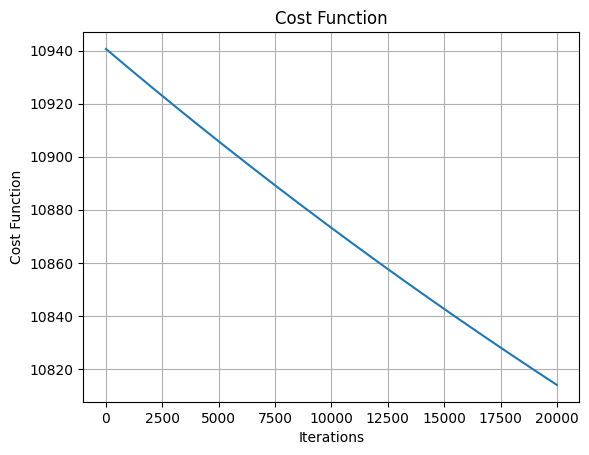

The model params are [-7.21631665e-04  2.98111267e-03 -1.35254763e-03 -3.21869764e-03
 -2.95697089e-03 -6.71861536e-04  0.00000000e+00 -1.80471375e-03
 -1.13290553e-03 -3.34831812e-03  1.91742823e-03  0.00000000e+00
 -1.96409885e-03  3.29142993e-03  2.45379201e-05 -7.30954150e-04
 -1.12671489e-04  6.88993591e-06 -2.29247291e-03 -9.87143559e-04
 -1.76890946e-03  2.14227130e-03 -1.71839026e-03 -1.89215790e-03
  2.37987001e-03 -2.21788553e-03  1.48280432e-03 -5.48476911e-03
  7.54319415e-03 -3.76654653e-03  6.12374613e-03 -5.85339290e-03
 -2.77928127e-03 -1.24914170e-03  1.50511812e-03 -5.27437877e-05
 -1.77150865e-04  5.39968376e-04 -1.63474363e-03  1.85774563e-03
 -1.58690469e-03 -1.22869369e-03  1.65688858e-03 -1.65122268e-03
 -5.19182756e-04  0.00000000e+00 -1.57876629e-03  2.41733266e-04
  2.03341675e-03  4.79886139e-04 -9.11942409e-04  8.96648919e-04
  1.21098249e-03  1.08971512e-03 -1.11387210e-03 -5.77061709e-04
  1.76630134e-04 -8.72311969e-05 -4.67648326e-04 -1.97296667e-04
 -4.

In [171]:
regression.runModel()

# Neural Network

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers import Activation, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [176]:
model = Sequential()
model.add(Dense(142, input_dim=142, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [177]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [191]:
history=model.fit(
    X_train, 
    y_train,
    epochs=300,
    validation_split=0.15, verbose=1, batch_size=64)

Epoch 1/300
210/210 [==============================] - 3s 15ms/step - loss: 0.6035 - sparse_categorical_accuracy: 0.6673 - val_loss: 0.6795 - val_sparse_categorical_accuracy: 0.5988
Epoch 2/300
210/210 [==============================] - 2s 9ms/step - loss: 0.6025 - sparse_categorical_accuracy: 0.6692 - val_loss: 0.6794 - val_sparse_categorical_accuracy: 0.5976
Epoch 3/300
210/210 [==============================] - 2s 9ms/step - loss: 0.6016 - sparse_categorical_accuracy: 0.6666 - val_loss: 0.6774 - val_sparse_categorical_accuracy: 0.5946
Epoch 4/300
210/210 [==============================] - 2s 12ms/step - loss: 0.5994 - sparse_categorical_accuracy: 0.6712 - val_loss: 0.6820 - val_sparse_categorical_accuracy: 0.5857
Epoch 5/300
210/210 [==============================] - 3s 13ms/step - loss: 0.6015 - sparse_categorical_accuracy: 0.6691 - val_loss: 0.6795 - val_sparse_categorical_accuracy: 0.5976
Epoch 6/300
210/210 [==============================] - 2s 10ms/step - loss: 0.6008 - sparse_

In [192]:
y_pred = model.predict(X_test)
y_pred

466/466 [==============================] - 1s 3ms/step


array([[0.49462944, 0.50537056],
       [0.6497466 , 0.3502533 ],
       [0.5324247 , 0.46757525],
       ...,
       [0.6258869 , 0.37411314],
       [0.46442932, 0.5355707 ],
       [0.55706006, 0.44293988]], dtype=float32)

In [193]:
lst=[]

for i in range(0,len(y_pred)):
     k=np.argmax(y_pred[i]) #it gives index value of the highest probability for each iteration 
     print(k)
     lst.append(k)

y_pred_label=np.array(lst)

Streaming output truncated to the last 5000 lines.
0
0
0
1
0
0
1
1
1
0
0
0
1
0
1
0
0
0
0
0
1
1
0
0
1
1
1
0
1
1
1
0
1
0
0
0
0
1
1
0
1
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
0
0
0
1
0
1
0
1
1
0
0
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
0
1
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
0
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
0
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
1
1
1
0
0
1
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
1
0
0
1
1
0
1
1
0
0
0
1
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
1
1
1
0

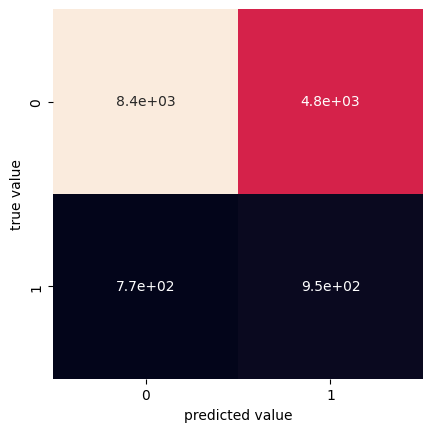

In [194]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred_label) #we dont do this because we dont get the whole number on the confusion matrixis to fet the whole number annotation
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [195]:
from sklearn.metrics import accuracy_score, recall_score

print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_label))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred_label))

Accuracy: 0.626
Recall: 0.553


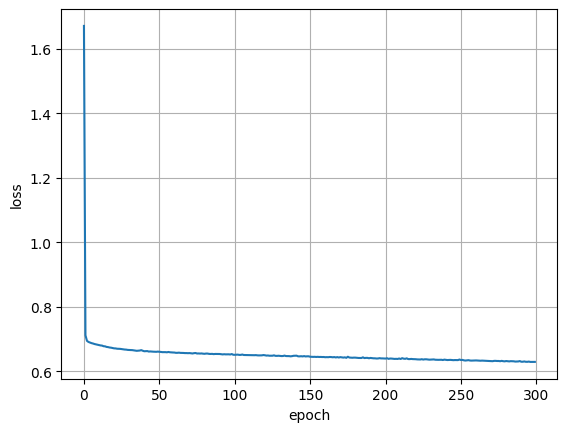

In [88]:
loss=history.history['loss']
def plot(loss):
        axis=list(range(0, len(loss),1))
        fig, ax = plt.subplots()
        ax.plot(axis, loss)
        ax.set_xlabel('epoch')
        ax.set_ylabel('loss')
        ax.grid()
        plt.show()
plot(loss)